#problem statement
#Build a simple linear regression model by performing EDA and do necessary transformation and select the best model using python
#Delivery_time -> predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df=pd.read_csv(r"C:\Users\DELL\Documents\Downloads\Excelr\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [3]:
df1 = df.rename({'Yearsexperience':'Years_experience','salary':'Salary'}, axis = 1)
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Checking Datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for Null Values

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,YearsExperience,Salary


# Plotting the data to check for outliers

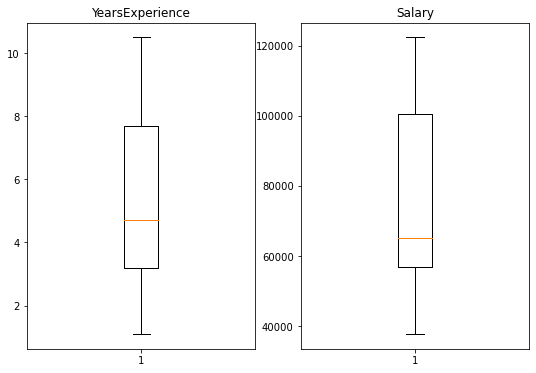

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

As you can see there are no Outliers in the data

# Checking the Correlation between variables

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization of Correlation beteen x and y

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

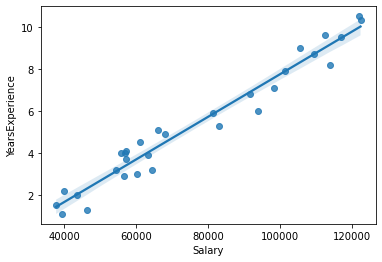

In [11]:
sns.regplot(x=df['Salary'],y=df['YearsExperience'])

There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

# Checking for Homoscedasticity or Hetroscedasticity

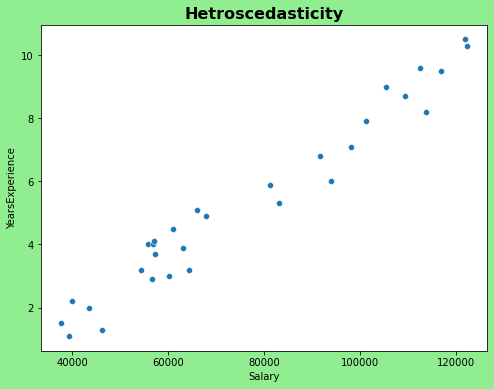

In [12]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Salary'], y = df['YearsExperience'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

It shows as the YearExperience Increases Salary also increases with much variation along the way
The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

# Feature Engineering

Trying different transformation of data to estimate normal distribution and to remove any skewness

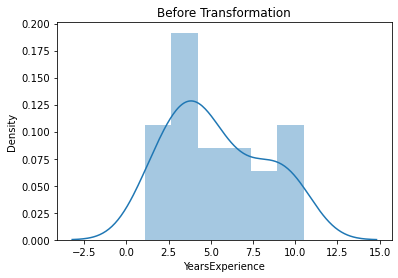

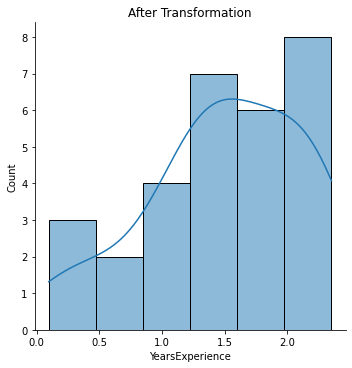

In [14]:
sns.distplot(df['YearsExperience'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

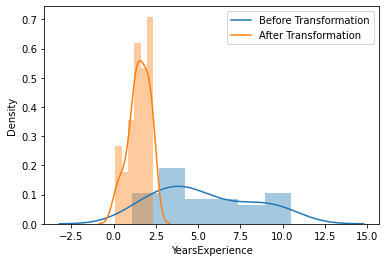

In [15]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 6, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

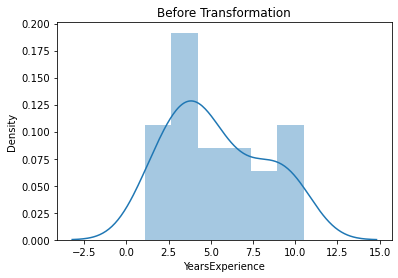

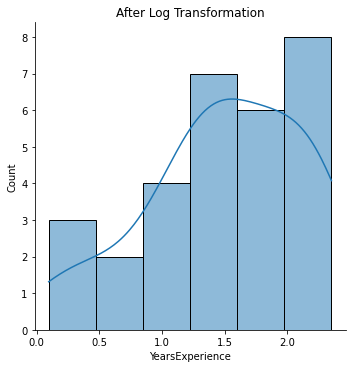

In [16]:
sns.distplot(df['YearsExperience'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

How log transformation affects the data and it scales the values down. Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

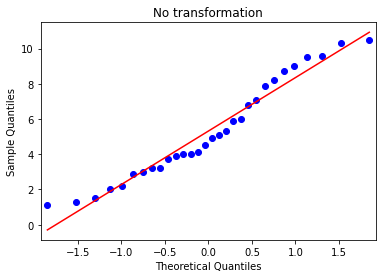

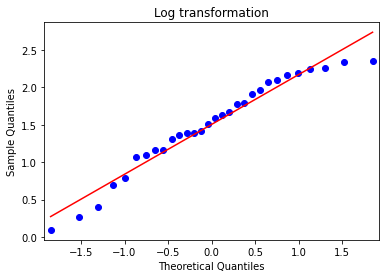

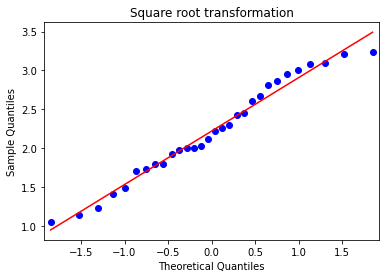

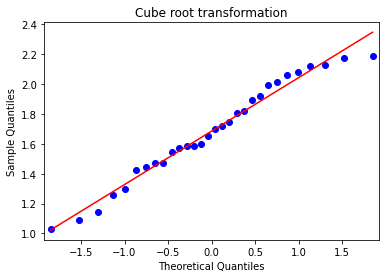

In [17]:
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

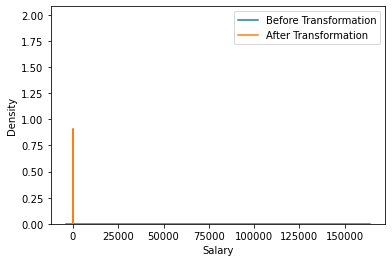

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.distplot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

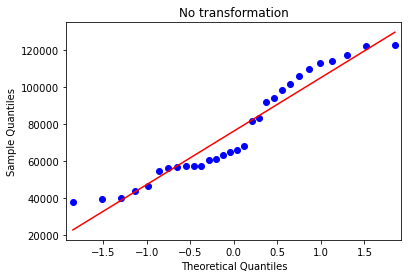

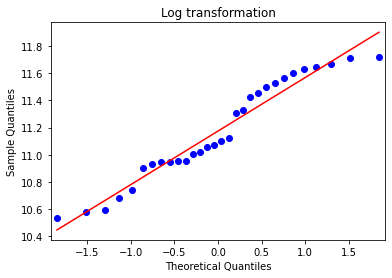

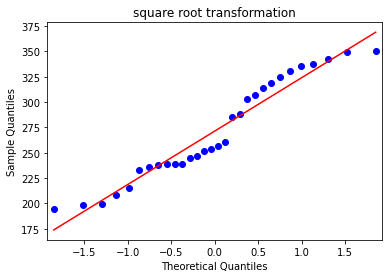

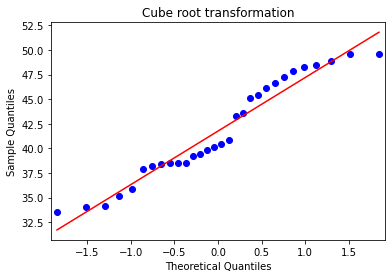

In [19]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Model Testing

In [20]:
model = sm.ols('YearsExperience~Salary', data = df1).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        16:20:20   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [24]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
# Manual prediction for say salary 5
delivery_time = (-2.383161) + (0.000101)*(5)
delivery_time

-2.382656

In [26]:
# Automatic Prediction for say Salary 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['Salary'])
data_pred

,Salary
0,5
1,8


# Predicitng from Original Model without any data transformation

In [34]:
predicted1 = pd.DataFrame()
predicted1['Salary'] = df1.Salary
predicted1['YearsExperience'] = df1.YearsExperience
predicted1['Predicted_YearsExperience'] = pd.DataFrame(model.predict(predicted1.Salary))
predicted1

,Salary,YearsExperience,Predicted_YearsExperience
0,39343.0,1.1,1.600934
1,46205.0,1.3,2.295819
2,37731.0,1.5,1.437694
3,43525.0,2.0,2.024427
4,39891.0,2.2,1.656428
5,56642.0,2.9,3.352729
6,60150.0,3.0,3.707969
7,54445.0,3.2,3.130248
8,64445.0,3.2,4.142905
9,57189.0,3.7,3.408121
